# CUBES Reference Mission Take 0

In [1]:
## Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
%matplotlib inline
from scipy.interpolate import interp1d
from scipy import interpolate
# import matplotlib.style as style
# style.available

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib

import matplotlib.style as style
style.available
style.use('seaborn-poster')
style.use('seaborn-white') #sets the size of the charts


In [2]:
def calc_CM_metabolic_rate(age, mass, height, sex):
    if sex == 'M':
        MR = (622 - 9.53*age + 1.25*(15.9*mass + 539.6*height))/(0.238853E3)
    elif sex == 'F':
        MR = (354 - 6.91*age + 1.25*(9.36*mass + 726*height))/(0.23885E3)
        
    return MR

In [10]:
calc_CM_metabolic_rate(45, 68, 1.8542, 'M')

82/(1.829**2)

24.5124342311959

In [12]:
age = np.linspace(19,65,100)
mass = np.linspace(54,99,100)
#height = np.linspace(1.4859,1.9304, 100)
# bmi = np.linspace(18,25,100)
#height = np.sqrt(mass/BMI)


In [25]:
def calc_height(bmi, mass):
    height = np.sqrt(mass/bmi)
    return height



5 16.439670263271648
10 16.249655499852377
15 16.14634265902545
25 15.967428234862172
50 15.608088279937688
75 15.131609126280324
85 14.927705237516337
90 14.786526008058278
95 14.53165983101324


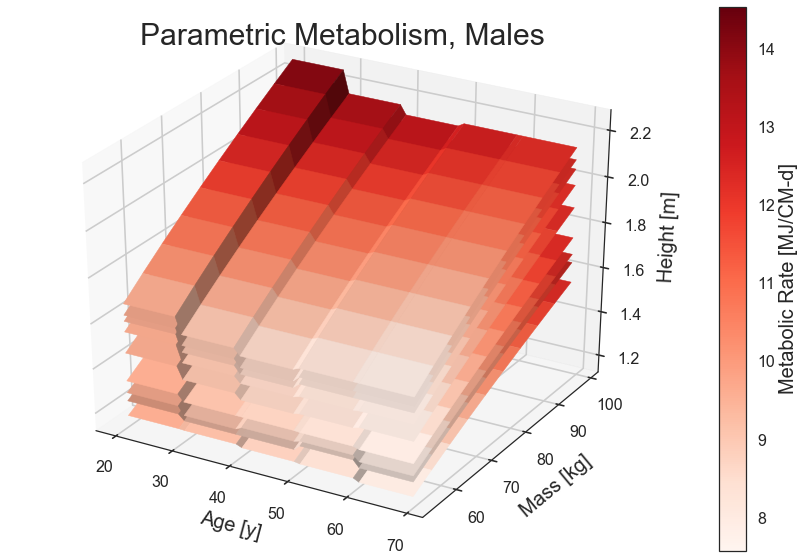

In [34]:
bmi_table = pd.read_excel('tables/bmi-by-age-male.xlsx')

percentiles = [5, 10, 15, 25, 50, 75, 85, 90, 95]
age = np.array(bmi_table['age'])
bmis = bmi_table[percentiles].values
bmis = np.transpose(bmis)

ageGrid_small, percentilesGrid_small = np.meshgrid(age,percentiles)
# plt.figure()
# plt.contourf(ageGrid_small,percentilesGrid_small,bmis)
# plt.colorbar()

percentile = 10
f = interpolate.interp2d(ageGrid_small,percentilesGrid_small,bmis, kind='linear')

# age = np.linspace(19,65,100)
# percentiles = np.linspace(5,95,10)
ageGrid, percentilesGrid = np.meshgrid(age,percentiles)
# plt.figure()
# plt.contourf(ageGrid,percentilesGrid,f(age,percentiles))
# plt.colorbar()


mass = np.linspace(54,99,10)
x,y = np.meshgrid(age,mass)
z = calc_height(f(age,5),y)

# plt.figure()
# plt.contourf(x,y,z)

fig = plt.figure(figsize=[15,10])

for p in percentiles:
    mass = np.linspace(54,99,10)
    x,y = np.meshgrid(age,mass)
    z = calc_height(f(age,p),y)

    MR_M = calc_CM_metabolic_rate(x,y,z,'M')
    
    print(p,np.max(MR_M))

    color_dimension = MR_M # change to desired fourth dimension
    minn, maxx = color_dimension.min(), color_dimension.max()
    norm = matplotlib.colors.Normalize(minn, maxx)
    m = plt.cm.ScalarMappable(norm=norm, cmap='Reds')
    m.set_array([])
    fcolors = m.to_rgba(color_dimension)

    ax = fig.gca(projection='3d')
    label = str(p)+'th Percentile'
    ax.plot_surface(x,y,z,rstride=1, cstride=1, facecolors=fcolors, vmin=minn, vmax=maxx, label=label)
    # ax.plot_surface(ageGrid,massGrid,bmiGrid, rstride=1, cstride=1, facecolors=fcolors, vmin=minn, vmax=maxx, shade=False)
    ax.set_xlabel('Age [y]', fontsize = 20)
    ax.set_ylabel('Mass [kg]', fontsize = 20)
    ax.set_zlabel('Height [m]',fontsize = 20)
    ax.xaxis.labelpad=20
    ax.yaxis.labelpad=20
    ax.zaxis.labelpad=20
cbar = fig.colorbar(m)
cbar.set_label('Metabolic Rate [MJ/CM-d]', fontsize=20)
ax.set_title('Parametric Metabolism, Males', fontsize=30)
fig.savefig('Parametric Metabolism, Males.png', dpi=300, bbox_inches='tight')

/Users/aaronberliner/anaconda3/lib/python3.6/site-packages/scipy/interpolate/_fitpack_impl.py:976: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=11,13 m=90 fp=1.875203 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


5 14.518600495216674
10 14.248824323136109
15 14.062079732422976
25 13.83122632299141
50 13.22467576183598
75 12.456850596126001
85 12.053667568029152
90 11.814260783857033
95 11.586283418653593


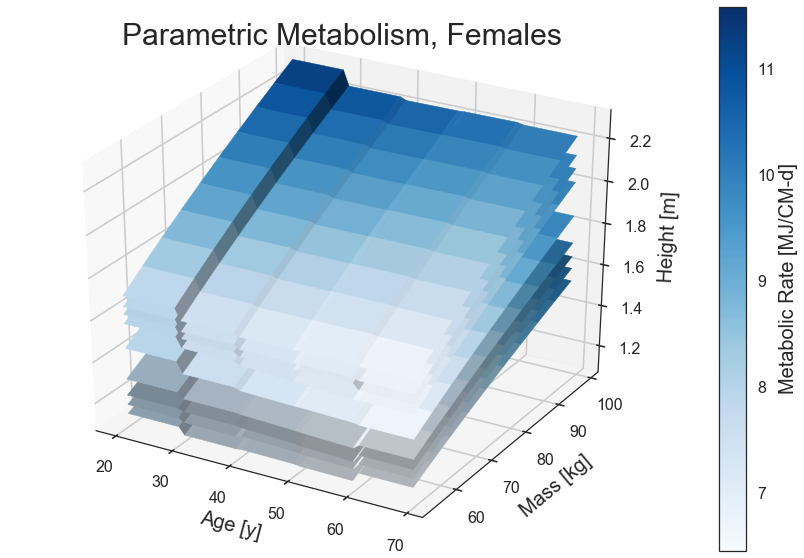

In [33]:
bmi_table = pd.read_excel('tables/bmi-by-age-female.xlsx')
percentiles = [5, 10, 15, 25, 50, 75, 85, 90, 95]
age = np.array(bmi_table['age'])
bmis = bmi_table[percentiles].values
bmis = np.transpose(bmis)

ageGrid_small, percentilesGrid_small = np.meshgrid(age,percentiles)
# plt.figure()
# plt.contourf(ageGrid_small,percentilesGrid_small,bmis)
# plt.colorbar()

# percentile = 10
f = interpolate.interp2d(ageGrid_small,percentilesGrid_small,bmis)

# age = np.linspace(19,65,100)
# percentiles = np.linspace(5,95,10)
# ageGrid, percentilesGrid = np.meshgrid(age,percentiles)
# plt.figure()
# plt.contourf(ageGrid,percentilesGrid,f(age,percentiles))
# plt.colorbar()

mass = np.linspace(54,99,10)
# x,y = np.meshgrid(age,mass)
# z = calc_height(f(age,5),y)

# plt.figure()
# plt.contourf(x,y,z)

fig = plt.figure(figsize=[15,10])

for p in percentiles:
    mass = np.linspace(54,99,10)
    x,y = np.meshgrid(age,mass)
    z = calc_height(f(age,p),y)
    


    MR_F = calc_CM_metabolic_rate(x,y,z,'F')
    print(p,np.max(MR_F), )
    
    color_dimension = MR_F # change to desired fourth dimension
    minn, maxx = color_dimension.min(), color_dimension.max()
    norm = matplotlib.colors.Normalize(minn, maxx)
    m = plt.cm.ScalarMappable(norm=norm, cmap='Blues')
    m.set_array([])
    fcolors = m.to_rgba(color_dimension)

    ax = fig.gca(projection='3d')
    label = str(p)+'th Percentile'
    ax.plot_surface(x,y,z,rstride=1, cstride=1, facecolors=fcolors, vmin=minn, vmax=maxx, label=label)
    # ax.plot_surface(ageGrid,massGrid,bmiGrid, rstride=1, cstride=1, facecolors=fcolors, vmin=minn, vmax=maxx, shade=False)
    ax.set_xlabel('Age [y]', fontsize = 20)
    ax.set_ylabel('Mass [kg]', fontsize = 20)
    ax.set_zlabel('Height [m]',fontsize = 20)
    ax.xaxis.labelpad=20
    ax.yaxis.labelpad=20
    ax.zaxis.labelpad=20
cbar = fig.colorbar(m)
cbar.set_label('Metabolic Rate [MJ/CM-d]', fontsize=20)
ax.set_title('Parametric Metabolism, Females', fontsize=30)
fig.savefig('Parametric Metabolism, Females.png', dpi=300, bbox_inches='tight')

[-0.00627723  0.46387394  1.52201033]
[ 0.00468445  0.55807269 -1.68182718]
[ 0.00185665  0.20892901 -0.61879407]
[ 0.04648651 -0.9551468   4.91720848]
[-2.13836353e-05  6.98938378e-02 -6.47978300e-03]
[-0.00010921  0.08987631 -0.0092491 ]


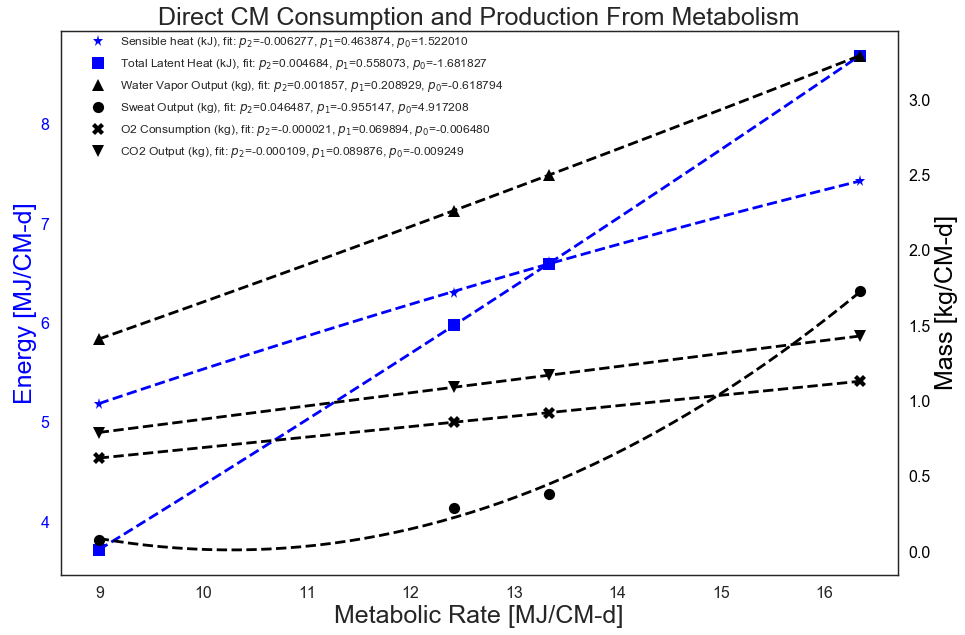

In [49]:
# # import matplotlib.style as style
# # style.available
# # style.use('Poster')
# style.use('seaborn-white') #sets the size of the charts
# # style.use('ggplot')


# def func_linear(x, m, b):
#     return m*x + b

bvad_3_29 = pd.read_csv('tables/bvad-3-29.csv')
cols = bvad_3_29.columns
cols = cols.drop(['Case','Metabolic rate (kJ)'])
fig, ax1 = plt.subplots(figsize=[15,10])
ax2 = ax1.twinx()
ax1.set_xlabel('Metabolic Rate [MJ/CM-d]',  fontsize = 25)
markers = ['*', 's', '^', 'o', 'X', 'v', '+']
for col in cols:
    xdata = bvad_3_29['Metabolic rate (kJ)']*1E-3
    ydata = bvad_3_29[col]
    
    

    if '(kJ)' in str(col):
        ydata = ydata*1E-3
        name = col.replace('kJ', 'MJ')
        ax1.set_ylabel('Energy [MJ/CM-d]', color='b', fontsize = 25)
        ax1.tick_params('y', colors='b')
        pf = np.polyfit(xdata,ydata,2)
        print(pf)
        p = np.poly1d(pf)
        px = np.linspace(np.min(xdata), np.max(xdata))
        ax1.plot(px,p(px),'b--')
        label=str(col)+ r', fit: $p_{2}$=%f, $p_{1}$=%f, $p_{0}$=%f' % tuple(pf)
        ax1.plot(xdata, ydata, 'b'+str(markers[cols.get_loc(col)]),label=label)
    
    else:
        ax2.set_ylabel('Mass [kg/CM-d]', color='k', fontsize = 25)
        ax2.tick_params('y', colors='k')
        pf = np.polyfit(xdata,ydata,2)
        print(pf)
        p = np.poly1d(pf)
        px = np.linspace(np.min(xdata), np.max(xdata))
        ax2.plot(px,p(px),'k--')
        label=str(col)+ r', fit: $p_{2}$=%f, $p_{1}$=%f, $p_{0}$=%f' % tuple(pf)
        ax2.plot(xdata, ydata, 'k'+str(markers[cols.get_loc(col)]), label=label)

        
ax2.set_title('Direct CM Consumption and Production From Metabolism', fontsize = 25)
fig.legend(loc='upper left', bbox_to_anchor=(0.07, .85), fontsize=12)
fig.savefig('Direct_CM_Consumption_and_Production_From_Metabolism.png', bbox_inches='tight', dpi=300)

In [39]:
np.where(MR_F==np.max(MR_F))[0][0]

9